## Analysis Paper for Synthetic Data use
Paper: "Data-driven battery electrode production process modeling enabled by machine learning"

The paper states use of synthetic data but misses to describe the sevirity.
In this notebook we want to find out some details about the synthetic data used.



Here is the overview of the synthetic data DOE process used in the Paper.
Orange = "Baseline"  
is everything else then synthetic?  

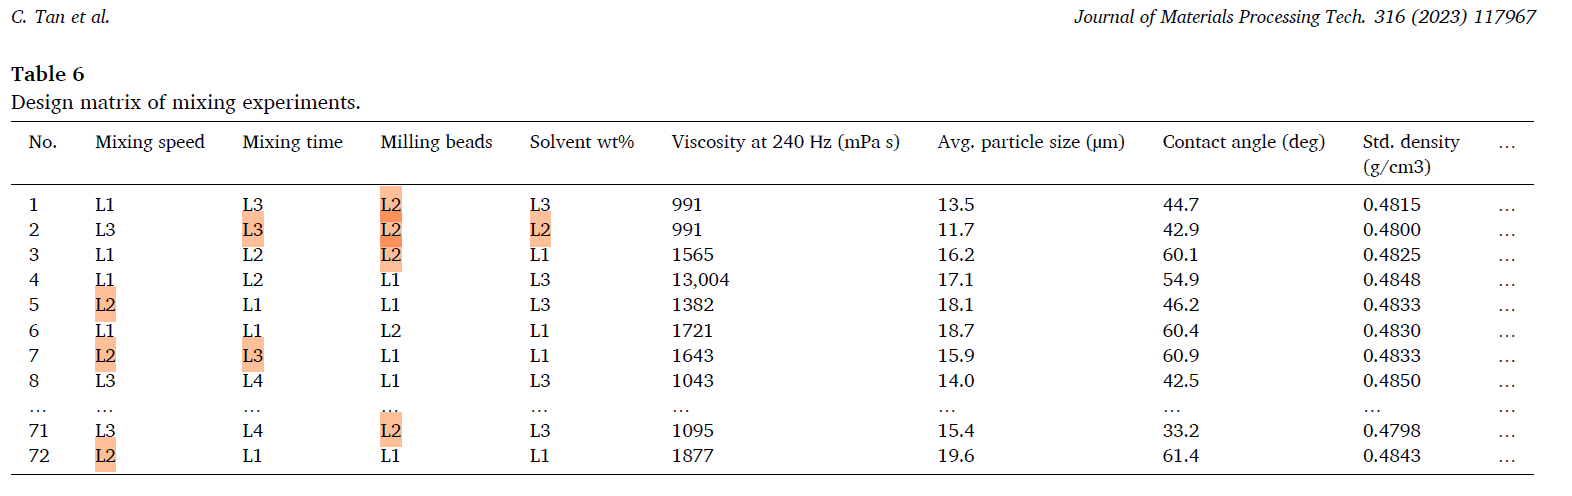

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [2]:
# read data
df = pd.read_csv("data_paper_mixerai.csv")

In [3]:
# sort and show
df.sort_values(["Solvent","Beads","Speed","Time"], inplace=True)
df.head(5)

,1,Speed,Beads,Solvent,Time,Viscosity_ 1,Viscosity 2,Viscosity_ 3,Particle size avg,Particle size std,Contact _angle,Density avg,Density std,_content avg,AM content std
57,59,1800,0,30.0,10,1955.63,1119.38,594.38,21.12,10.15,70.43,1.92,0.49,63.22,16.27
31,33,1800,0,30.0,20,1799.18,1029.83,546.83,18.60,7.63,70.10,1.92,0.49,63.22,16.27
47,49,1800,0,30.0,30,1720.95,985.05,523.05,17.40,6.43,69.92,1.92,0.49,63.22,16.27
69,71,1800,0,30.0,40,1668.80,955.20,507.20,17.25,6.28,69.73,1.92,0.49,63.22,16.27
71,73,2000,0,30.0,10,1877.40,1074.60,570.60,19.62,9.97,61.43,1.92,0.48,63.22,16.24


# Base Var: Milling Beads

H0: Beads 0 is a synthetic counter of Beads 5

The easiest way to check if syn data is involved is using Milling Beads as a divider for subsamples, hence this feature only has two different values.

In [5]:
#create two subset based on Beads
df_beads_0 = df[df["Beads"] == 0]
df_beads_0.head()
df_beads_5 = df[df["Beads"] == 5]
df_beads_5.head()

,1,Speed,Beads,Solvent,Time,Viscosity_ 1,Viscosity 2,Viscosity_ 3,Particle size avg,Particle size std,Contact _angle,Density avg,Density std,_content avg,AM content std
5,7,1800,5,30.0,10,1720.95,985.05,523.05,18.72,9.69,60.43,1.92,0.48,63.22,16.02
2,4,1800,5,30.0,20,1564.50,895.50,475.50,16.20,7.17,60.10,1.92,0.48,63.22,16.02
21,23,1800,5,30.0,30,1486.28,850.73,451.73,15.00,5.97,59.92,1.92,0.48,63.22,16.02
13,15,1800,5,30.0,40,1434.13,820.88,435.88,14.85,5.82,59.73,1.92,0.48,63.22,16.02
39,41,2000,5,30.0,10,1642.73,940.28,499.28,17.22,9.51,51.43,1.92,0.48,63.22,15.99


In [6]:
# create a plotly histogramm from df
import plotly.express as px
fig = make_subplots(rows=1, cols=2, subplot_titles=["Beds 0","Beds 5"])


# Create a line trace for the first subset
trace1 = go.Scatter(
    x=df_beads_0["Time"],
    y=df_beads_0["Viscosity_ 1"],
    mode='lines',
    name='Viscosity 1 (Bed 0)'
)

# Create a line trace for the second subset
trace2 = go.Scatter(
    x=df_beads_5["Time"],
    y=df_beads_5["Viscosity_ 1"],
    mode='lines',
    name='Viscosity 1 (Bed 5)'
)

# Add traces to the figure
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Show the figure
fig.show()


In [7]:
# create a plotly histogramm from df
import plotly.express as px
fig = make_subplots(rows=1, cols=2, subplot_titles=["Beds 0","Beds 5"])


# Create a line trace for the first subset
trace1 = go.Scatter(
    x=df_beads_0["Time"],
    y=df_beads_0["Viscosity 2"],
    mode='lines',
    name='Viscosity 1 (Bed 0)'
)

# Create a line trace for the second subset
trace2 = go.Scatter(
    x=df_beads_5["Time"],
    y=df_beads_5["Viscosity 2"],
    mode='lines',
    name='Viscosity 1 (Bed 5)'
)

# Add traces to the figure
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Show the figure
fig.show()


In [8]:
# create a plotly histogramm from df
import plotly.express as px
fig = make_subplots(rows=1, cols=2, subplot_titles=["Beds 0","Beds 5"])


# Create a line trace for the first subset
trace1 = go.Scatter(
    x=df_beads_0["Time"],
    y=df_beads_0["Particle size avg"],
    mode='lines',
    name='Viscosity 1 (Bed 0)'
)

# Create a line trace for the second subset
trace2 = go.Scatter(
    x=df_beads_5["Time"],
    y=df_beads_5["Particle size avg"],
    mode='lines',
    name='Viscosity 1 (Bed 5)'
)

# Add traces to the figure
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

# Show the figure
fig.show()


### look verry much the same
so is beds 0 a synthetic counter to 5?

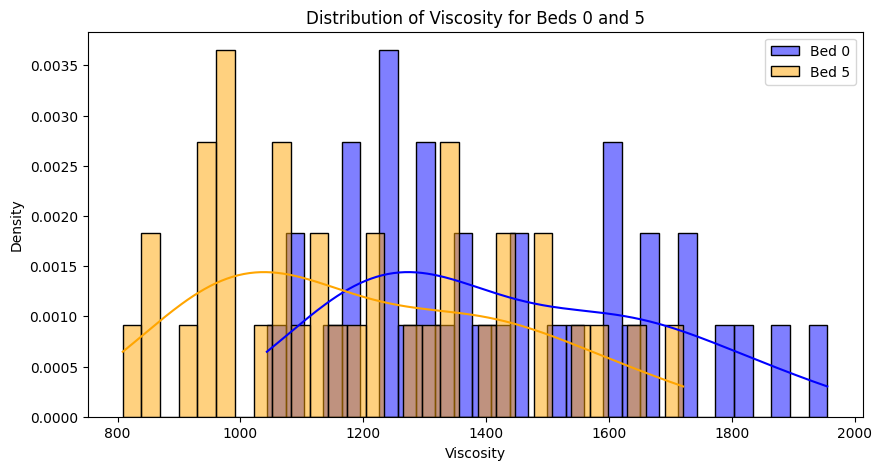

In [9]:
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# 1. Visualize the distributions using histograms
plt.figure(figsize=(10, 5))
sns.histplot(df_beads_0["Viscosity_ 1"], color='blue', label='Bed 0', kde=True, stat="density", bins=30)
sns.histplot(df_beads_5["Viscosity_ 1"], color='orange', label='Bed 5', kde=True, stat="density", bins=30)
plt.legend()
plt.title('Distribution of Viscosity for Beds 0 and 5')
plt.xlabel('Viscosity')
plt.ylabel('Density')
plt.show()


## Paired T-Test or WC-Srank

- Paired T-Test: If the datasets are paired (i.e., each value in the synthetic dataset corresponds to a value in the original dataset) a paired t-test shows  if the means are significantly different.

- Wilcoxon Signed-Rank Test: If the data is not normally distributed, the Wilcoxon signed-rank test shows for paired samples.

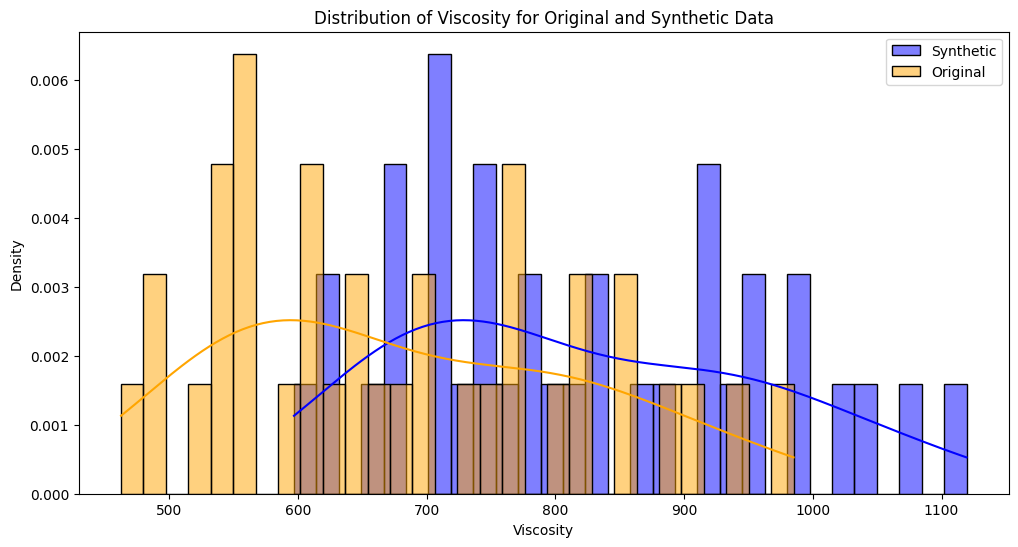

Original Mean: 818.3899999999999, Synthetic Mean: 684.0649999999999
Original Median: 783.565, Synthetic Median: 649.24
Paired T-Test Statistic: 158935.4833730655, P-value: 1.274279732235349e-156
                            OLS Regression Results                            
Dep. Variable:            Viscosity 2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.614e+10
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          1.18e-152
Time:                        11:52:26   Log-Likelihood:                 139.69
No. Observations:                  36   AIC:                            -275.4
Df Residuals:                      34   BIC:                            -272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
               

In [10]:
import statsmodels.api as sm

# Extract the Viscosity data
viscosity_bed_0 = df_beads_0["Viscosity 2"].reset_index(drop=True)
viscosity_bed_5 = df_beads_5["Viscosity 2"].reset_index(drop=True)

# Check if both datasets have the same length
if len(viscosity_bed_0) != len(viscosity_bed_5):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(viscosity_bed_0, color='blue', label='Synthetic', kde=True, stat="density", bins=30)
    sns.histplot(viscosity_bed_5, color='orange', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Viscosity for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(viscosity_bed_0)
    mean_bed_5 = np.mean(viscosity_bed_5)
    median_bed_0 = np.median(viscosity_bed_0)
    median_bed_5 = np.median(viscosity_bed_5)

    print(f"Original Mean: {mean_bed_0}, Synthetic Mean: {mean_bed_5}")
    print(f"Original Median: {median_bed_0}, Synthetic Median: {median_bed_5}")

    # 3. Paired T-Test (if applicable)
    t_statistic, p_value = stats.ttest_rel(viscosity_bed_0, viscosity_bed_5)
    print(f"Paired T-Test Statistic: {t_statistic}, P-value: {p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(viscosity_bed_0)  # Add a constant for the intercept
    model = sm.OLS(viscosity_bed_5, X).fit()

    # Print the regression results
    print(model.summary())


### Particle size

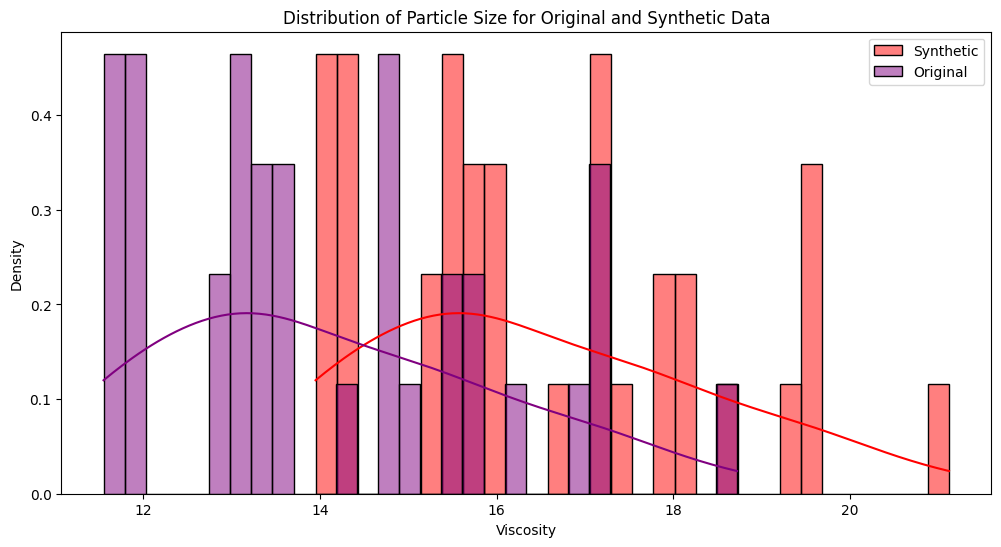

Original Mean: 16.4925, Synthetic Mean: 14.0925
Original Median: 15.9, Synthetic Median: 13.5
Paired T-Test Statistic: 1.2933466803899526e+16, P-value: 0.0
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.449e+30
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:53:17   Log-Likelihood:                 1112.8
No. Observations:                  36   AIC:                            -2222.
Df Residuals:                      34   BIC:                            -2219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [11]:
# Extract the Viscosity data
viscosity_bed_0 = df_beads_0["Particle size avg"].reset_index(drop=True)
viscosity_bed_5 = df_beads_5["Particle size avg"].reset_index(drop=True)

# Check if both datasets have the same length
if len(viscosity_bed_0) != len(viscosity_bed_5):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(viscosity_bed_0, color='red', label='Synthetic', kde=True, stat="density", bins=30)
    sns.histplot(viscosity_bed_5, color='purple', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Particle Size for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(viscosity_bed_0)
    mean_bed_5 = np.mean(viscosity_bed_5)
    median_bed_0 = np.median(viscosity_bed_0)
    median_bed_5 = np.median(viscosity_bed_5)

    print(f"Original Mean: {mean_bed_0}, Synthetic Mean: {mean_bed_5}")
    print(f"Original Median: {median_bed_0}, Synthetic Median: {median_bed_5}")

    # 3. Paired T-Test (if applicable)
    t_statistic, p_value = stats.ttest_rel(viscosity_bed_0, viscosity_bed_5)
    print(f"Paired T-Test Statistic: {t_statistic}, P-value: {p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(viscosity_bed_0)  # Add a constant for the intercept
    model = sm.OLS(viscosity_bed_5, X).fit()

    # Print the regression results
    print(model.summary())

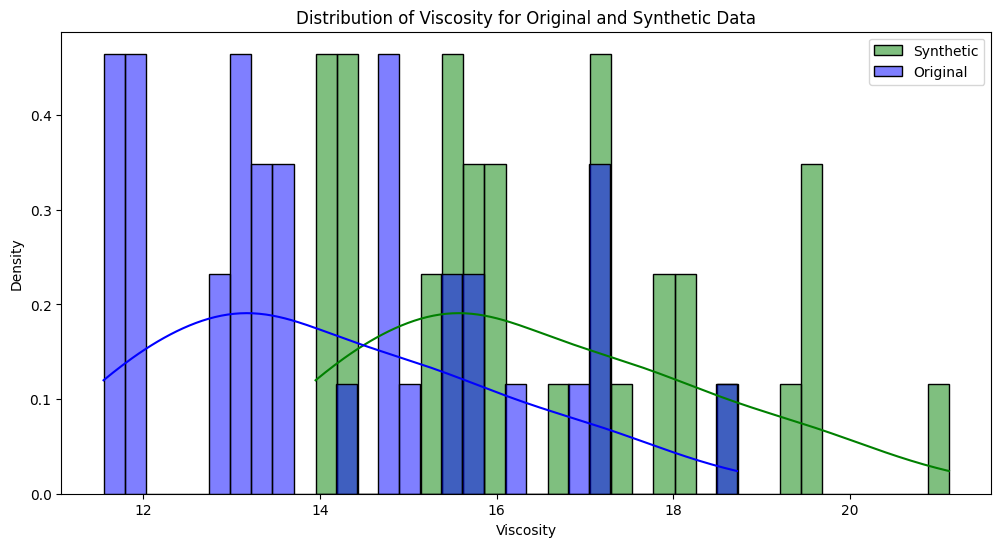

Original Mean: 16.4925, Synthetic Mean: 14.0925
Original Median: 15.9, Synthetic Median: 13.5
Wilcoxon Signed-Rank Statistic: 0.0, P-value: 2.9103830456733704e-11
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.449e+30
Date:                Wed, 23 Oct 2024   Prob (F-statistic):               0.00
Time:                        11:57:26   Log-Likelihood:                 1112.8
No. Observations:                  36   AIC:                            -2222.
Df Residuals:                      34   BIC:                            -2219.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err        

In [12]:
# Check if both datasets have the same length
if len(viscosity_bed_0) != len(viscosity_bed_5):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(viscosity_bed_0, color='green', label='Synthetic', kde=True, stat="density", bins=30)
    sns.histplot(viscosity_bed_5, color='blue', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Viscosity for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(viscosity_bed_0)
    mean_bed_5 = np.mean(viscosity_bed_5)
    median_bed_0 = np.median(viscosity_bed_0)
    median_bed_5 = np.median(viscosity_bed_5)

    print(f"Original Mean: {mean_bed_0}, Synthetic Mean: {mean_bed_5}")
    print(f"Original Median: {median_bed_0}, Synthetic Median: {median_bed_5}")

    # 3. Wilcoxon Signed-Rank Test
    wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(viscosity_bed_0, viscosity_bed_5)
    print(f"Wilcoxon Signed-Rank Statistic: {wilcoxon_statistic}, P-value: {wilcoxon_p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(viscosity_bed_0)  # Add a constant for the intercept
    model = sm.OLS(viscosity_bed_5, X).fit()

    # Print the regression results
    print(model.summary())

# Base Var: Solvent

H0: Solvent 35 the only original data and are 34.6 and 39.2 synthetic


In [13]:
df.Solvent.unique()

array([30. , 34.6, 39.2])

In [14]:
#create two subset based on Beads
df_solvent_30= df[df["Solvent"] == 30.]
df_solvent_35 = df[df["Solvent"] == 34.6]
df_solvent_39 = df[df["Solvent"] == 39.2]

print(f"Länge solvent 30: {len(df_solvent_30)}")
print(f"Länge solvent 35: {len(df_solvent_35)}")
print(f"Länge solvent 39: {len(df_solvent_39)}")


Länge solvent 30: 24
Länge solvent 35: 24
Länge solvent 39: 24


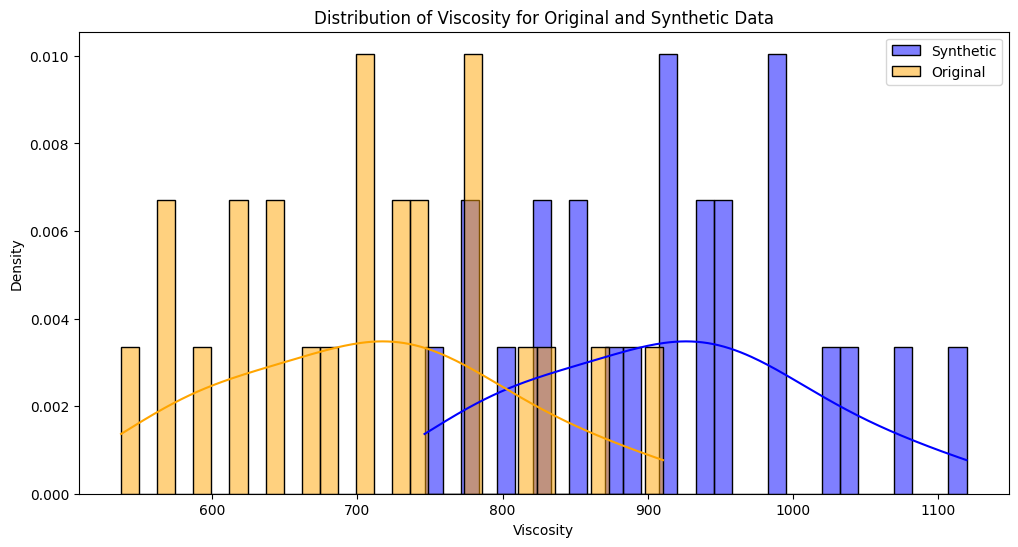

Original Mean: 915.4025, Synthetic Mean: 706.4525
Original Median: 910.43, Synthetic Median: 701.48
Paired T-Test Statistic: 1.5267106473722574e+16, P-value: 0.0
                            OLS Regression Results                            
Dep. Variable:            Viscosity 2   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.254e+29
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          8.11e-316
Time:                        12:01:26   Log-Likelihood:                 645.84
No. Observations:                  24   AIC:                            -1288.
Df Residuals:                      22   BIC:                            -1285.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t    

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



In [16]:
import statsmodels.api as sm

# Extract the Viscosity data
viscosity_bed_0 = df_solvent_30["Viscosity 2"].reset_index(drop=True)
viscosity_bed_5 = df_solvent_35["Viscosity 2"].reset_index(drop=True)

# Check if both datasets have the same length
if len(viscosity_bed_0) != len(viscosity_bed_5):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(viscosity_bed_0, color='blue', label='Synthetic', kde=True, stat="density", bins=30)
    sns.histplot(viscosity_bed_5, color='orange', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Viscosity for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(viscosity_bed_0)
    mean_bed_5 = np.mean(viscosity_bed_5)
    median_bed_0 = np.median(viscosity_bed_0)
    median_bed_5 = np.median(viscosity_bed_5)

    print(f"Original Mean: {mean_bed_0}, Synthetic Mean: {mean_bed_5}")
    print(f"Original Median: {median_bed_0}, Synthetic Median: {median_bed_5}")

    # 3. Paired T-Test (if applicable)
    t_statistic, p_value = stats.ttest_rel(viscosity_bed_0, viscosity_bed_5)
    print(f"Paired T-Test Statistic: {t_statistic}, P-value: {p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(viscosity_bed_0)  # Add a constant for the intercept
    model = sm.OLS(viscosity_bed_5, X).fit()

    # Print the regression results
    print(model.summary())


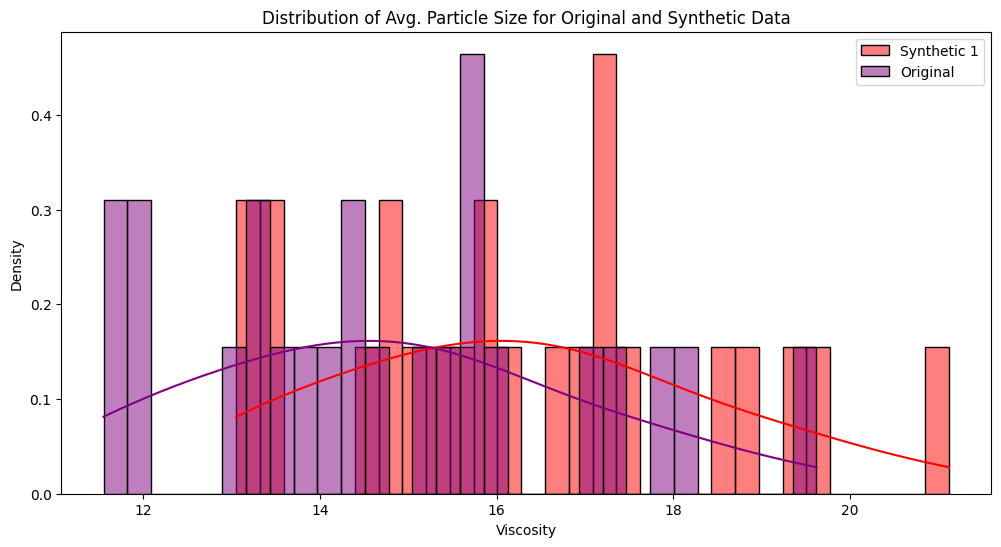

Synthetic 1 Mean: 16.2925, Original Mean: 14.792499999999999
Synthetic 1 Median: 16.05, Original Median: 14.55
Wilcoxon Signed-Rank Statistic: 0.0, P-value: 1.1920928955078125e-07
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+30
Date:                Wed, 23 Oct 2024   Prob (F-statistic):          4.82e-317
Time:                        11:57:38   Log-Likelihood:                 740.61
No. Observations:                  24   AIC:                            -1477.
Df Residuals:                      22   BIC:                            -1475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef  

In [15]:
# Extract the Avg. Particle Size data
test_group1 = df_solvent_30["Particle size avg"].reset_index(drop=True)
test_group2 = df_solvent_35["Particle size avg"].reset_index(drop=True)

# Check if both datasets have the same length
if len(df_solvent_30) != len(df_solvent_35):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(test_group1, color='red', label='Synthetic 1', kde=True, stat="density", bins=30)
    sns.histplot(test_group2, color='purple', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Avg. Particle Size for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(test_group1)
    mean_bed_5 = np.mean(test_group2)
    median_bed_0 = np.median(test_group1)
    median_bed_5 = np.median(test_group2)

    print(f"Synthetic 1 Mean: {mean_bed_0}, Original Mean: {mean_bed_5}")
    print(f"Synthetic 1 Median: {median_bed_0}, Original Median: {median_bed_5}")

    # 3. Wilcoxon Signed-Rank Test
    wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(test_group1, test_group2)
    print(f"Wilcoxon Signed-Rank Statistic: {wilcoxon_statistic}, P-value: {wilcoxon_p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(test_group1)  # Add a constant for the intercept
    model = sm.OLS(test_group2, X).fit()

    # Print the regression results
    print(model.summary())

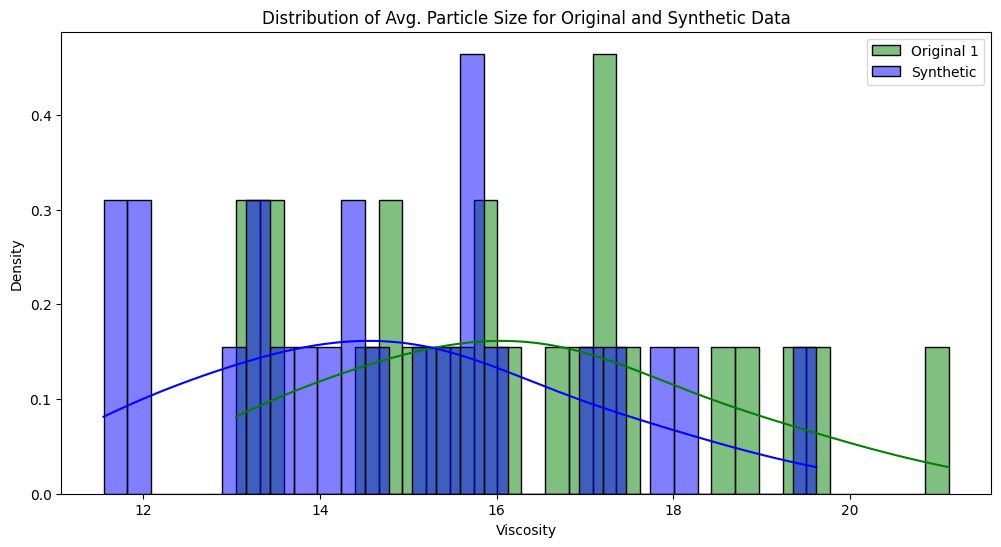

Original Mean: 16.2925, Synthetic Mean: 14.792499999999999
Original Median: 16.05, Synthetic Median: 14.55
Wilcoxon Signed-Rank Statistic: 0.0, P-value: 1.1920928955078125e-07
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.067e+30
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          4.82e-317
Time:                        08:56:22   Log-Likelihood:                 740.61
No. Observations:                  24   AIC:                            -1477.
Df Residuals:                      22   BIC:                            -1475.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    st

In [ ]:
# Extract the Avg. Particle Size data
test_group1 = df_solvent_30["Particle size avg"].reset_index(drop=True)
test_group2 = df_solvent_39["Particle size avg"].reset_index(drop=True)

# Check if both datasets have the same length
if len(df_solvent_30) != len(df_solvent_35):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(test_group1, color='green', label='Synthetic 1', kde=True, stat="density", bins=30)
    sns.histplot(test_group2, color='blue', label='Synthetic 2', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Avg. Particle Size for Original and Synthetic Data')
    plt.xlabel('Viscosity')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(test_group1)
    mean_bed_5 = np.mean(test_group2)
    median_bed_0 = np.median(test_group1)
    median_bed_5 = np.median(test_group2)

    print(f"Synthetic 1 Mean: {mean_bed_0}, Synthetic 2 Mean: {mean_bed_5}")
    print(f"Synthetic 1 Median: {median_bed_0}, Synthetic 2 Median: {median_bed_5}")

    # 3. Wilcoxon Signed-Rank Test
    wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(test_group1, test_group2)
    print(f"Wilcoxon Signed-Rank Statistic: {wilcoxon_statistic}, P-value: {wilcoxon_p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(test_group1)  # Add a constant for the intercept
    model = sm.OLS(test_group2, X).fit()

    # Print the regression results
    print(model.summary())

## Base Var: Mixing speed

h0: Mixing Speeds used as a base var

In [ ]:
df.head()

,1,Speed,Beads,Solvent,Time,Viscosity_ 1,Viscosity 2,Viscosity_ 3,Particle size avg,Particle size std,Contact _angle,Density avg,Density std,_content avg,AM content std
57,59,1800,0,30.0,10,1955.63,1119.38,594.38,21.12,10.15,70.43,1.92,0.49,63.22,16.27
31,33,1800,0,30.0,20,1799.18,1029.83,546.83,18.60,7.63,70.10,1.92,0.49,63.22,16.27
47,49,1800,0,30.0,30,1720.95,985.05,523.05,17.40,6.43,69.92,1.92,0.49,63.22,16.27
69,71,1800,0,30.0,40,1668.80,955.20,507.20,17.25,6.28,69.73,1.92,0.49,63.22,16.27
71,73,2000,0,30.0,10,1877.40,1074.60,570.60,19.62,9.97,61.43,1.92,0.48,63.22,16.24


In [ ]:
df.Speed.unique()

array([1800, 2000, 2200])

In [ ]:
#create two subset based on Beads
df_Speed_1800= df[df["Speed"] == 1800]
df_Speed_2000 = df[df["Speed"] == 2000]
df_Speed_2200 = df[df["Speed"] == 2200]

print(f"Länge Speed 1800: {len(df_Speed_1800)}")
print(f"Länge Speed 2000: {len(df_Speed_2000)}")
print(f"Länge Speed 2200: {len(df_Speed_2200)}")



Länge Speed 1800: 24
Länge Speed 2000: 24
Länge Speed 2200: 24


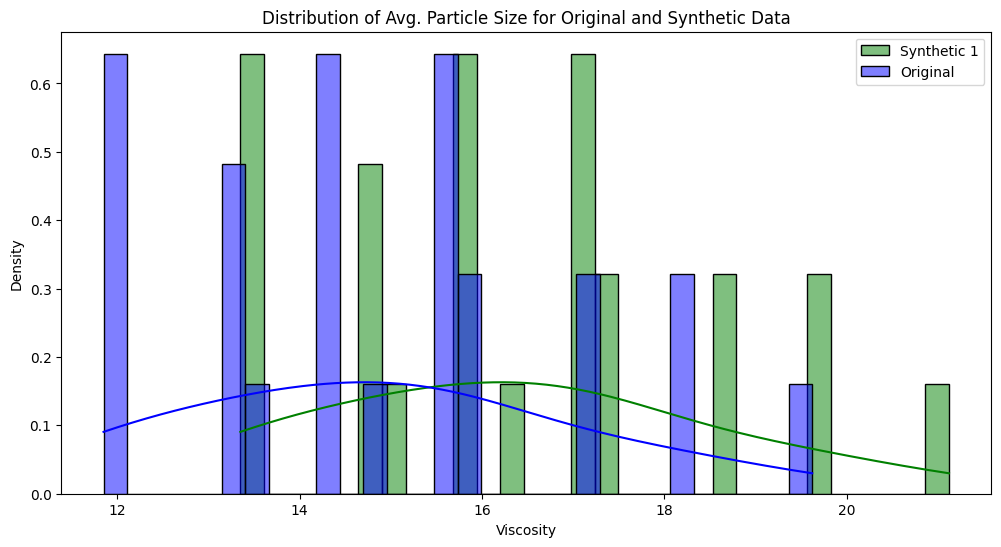

Synthetic 1 Mean: 16.3925, Original Mean: 14.8925
Synthetic 1 Median: 16.05, Original Median: 14.55
Wilcoxon Signed-Rank Statistic: 0.0, P-value: 1.1920928955078125e-07
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.144e+30
Date:                Tue, 22 Oct 2024   Prob (F-statistic):          2.23e-317
Time:                        09:12:53   Log-Likelihood:                 741.78
No. Observations:                  24   AIC:                            -1480.
Df Residuals:                      22   BIC:                            -1477.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err  

In [ ]:
# Extract the Avg. Particle Size data
test_group1 = df_Speed_1800["Particle size avg"].reset_index(drop=True)
test_group2 = df_Speed_2000["Particle size avg"].reset_index(drop=True)

# Check if both datasets have the same length
if len(df_solvent_30) != len(df_solvent_35):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(test_group1, color='green', label='Synthetic 1', kde=True, stat="density", bins=30)
    sns.histplot(test_group2, color='blue', label='Original', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Avg. Particle Size for Original and Synthetic Data')
    plt.xlabel('Particle Size')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(test_group1)
    mean_bed_5 = np.mean(test_group2)
    median_bed_0 = np.median(test_group1)
    median_bed_5 = np.median(test_group2)

    print(f"Synthetic 1 Mean: {mean_bed_0}, Original Mean: {mean_bed_5}")
    print(f"Synthetic 1 Median: {median_bed_0}, Original Median: {median_bed_5}")

    # 3. Wilcoxon Signed-Rank Test
    wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(test_group1, test_group2)
    print(f"Wilcoxon Signed-Rank Statistic: {wilcoxon_statistic}, P-value: {wilcoxon_p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(test_group1)  # Add a constant for the intercept
    model = sm.OLS(test_group2, X).fit()

    # Print the regression results
    print(model.summary())

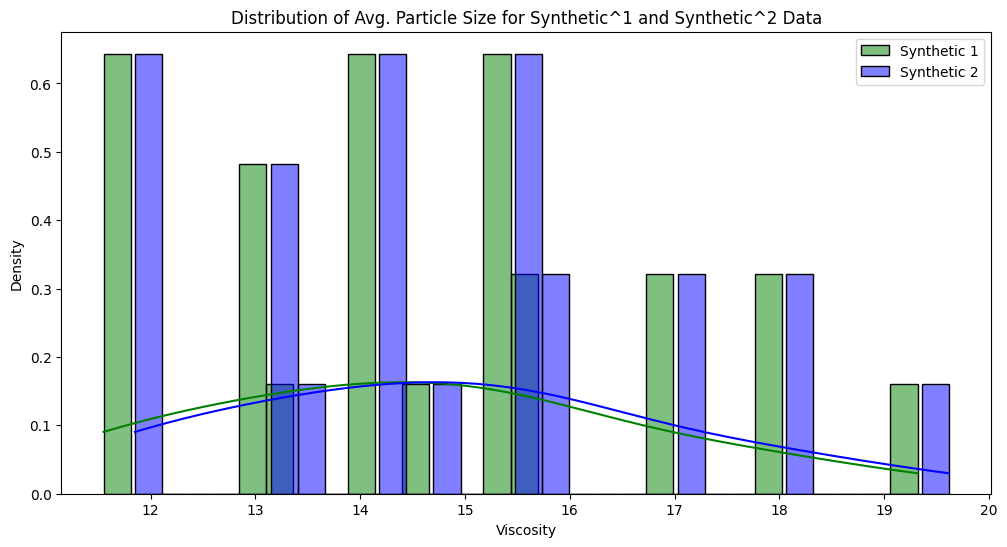

Synthetic 1 Mean: 14.592500000000001, Syn 2 Mean: 14.8925
Synthetic 1 Median: 14.25, Syn 2 Median: 14.55
Wilcoxon Signed-Rank Statistic: 0.0, P-value: 1.1920928955078125e-07
                            OLS Regression Results                            
Dep. Variable:      Particle size avg   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.056e+31
Date:                Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:13:48   Log-Likelihood:                 789.40
No. Observations:                  24   AIC:                            -1575.
Df Residuals:                      22   BIC:                            -1572.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std 

In [ ]:
# Extract the Avg. Particle Size data
test_group1 = df_Speed_2200["Particle size avg"].reset_index(drop=True)
test_group2 = df_Speed_2000["Particle size avg"].reset_index(drop=True)

# Check if both datasets have the same length
if len(df_solvent_30) != len(df_solvent_35):
    print("The two datasets have different lengths. Please check your data.")
else:
    # 1. Visual Comparison
    plt.figure(figsize=(12, 6))
    sns.histplot(test_group1, color='green', label='Synthetic 1', kde=True, stat="density", bins=30)
    sns.histplot(test_group2, color='blue', label='Synthetic 2', kde=True, stat="density", bins=30)
    plt.legend()
    plt.title('Distribution of Avg. Particle Size for Synthetic^1 and Synthetic^2 Data')
    plt.xlabel('Particle Size')
    plt.ylabel('Density')
    plt.show()

    # 2. Descriptive Statistics
    mean_bed_0 = np.mean(test_group1)
    mean_bed_5 = np.mean(test_group2)
    median_bed_0 = np.median(test_group1)
    median_bed_5 = np.median(test_group2)

    print(f"Synthetic 1 Mean: {mean_bed_0}, Syn 2 Mean: {mean_bed_5}")
    print(f"Synthetic 1 Median: {median_bed_0}, Syn 2 Median: {median_bed_5}")

    # 3. Wilcoxon Signed-Rank Test
    wilcoxon_statistic, wilcoxon_p_value = stats.wilcoxon(test_group1, test_group2)
    print(f"Wilcoxon Signed-Rank Statistic: {wilcoxon_statistic}, P-value: {wilcoxon_p_value}")

    # 4. Fit a Linear Model
    X = sm.add_constant(test_group1)  # Add a constant for the intercept
    model = sm.OLS(test_group2, X).fit()

    # Print the regression results
    print(model.summary())

## HOW MUCH data is Synthetic???

- we can select the data per baseline freature value

In [ ]:
df.dtypes

,0
1,int64
Speed,int64
Beads,int64
Solvent,float64
Time,int64
Viscosity_ 1,float64
Viscosity 2,float64
Viscosity_ 3,float64
Particle size avg,float64
Particle size std,float64


In [ ]:
# Ground truth dataset + 4 deviation datasets were used. to extrapolate.
df_baseline = df[(df["Speed"] == 2000) & (df["Time"] == 30) & (df["Beads"] == 5) & (df["Solvent"] == 34.60)]
df_baseline.shape[0]

1

In [ ]:
df_baseline.head()

,1,Speed,Beads,Solvent,Time,Viscosity_ 1,Viscosity 2,Viscosity_ 3,Particle size avg,Particle size std,Contact _angle,Density avg,Density std,_content avg,AM content std
11,13,2000,5,34.6,30,1043.0,597.0,317.0,12.0,5.75,45.92,1.9,0.48,62.12,15.91


This is the baseline + one experiment for a single variation of each input variable
